**Telecom_Churn_Prediction**
---

## <b> Project Overview </b>
The objective of this project was to develop a binary classification model to predict whether a customer of SyriaTel, a telecommunications company, is likely to stop doing business in the near future.

The primary goal was to identify predictable patterns in customer behavior in order to help the company reduce financial losses associated with customer churn. 



---
## <b> Business Understanding </b>

Customer churn has emerged as a critical concern for companies like SyriaTel in the fiercely competitive telecommunications industry. With customers having numerous options and increasing expectations, retaining existing customers has become paramount. 
Churn not only leads to immediate revenue loss but also exerts significant pressure on customer acquisition costs. Understanding the factors that contribute to churn and being able to predict it with accuracy is crucial for telecom businesses to develop effective retention strategies. By analyzing historical customer data, telecom companies can gain valuable insights into customer behavior, preferences, and interactions, enabling them to identify potential churners and tailor retention efforts accordingly and proactively.
This proactive approach minimizes revenue loss and enhances customer satisfaction, loyalty, and overall business performance.


### <b> Problem Statement </b>
SyriaTel would like to maintain/increase the customer retention rate as well as seeking to address the challenge of customer churn by developing an accurate binary classification model that predicts the likelihood of customers discontinuing their services.

### <b> Objectives </b>
The objective of this analysis is to:
1. Develop a highly accurate binary classification model that predicts customer churn for SyriaTel.
2. Identify predictable patterns and insights in customer behavior to proactively identify customers at a high risk of churning.
3. Enable SyriaTel to optimize retention strategies, allocate resources effectively, and minimize financial losses associated with customer churn.


### <b> Metrics of Success </b>
The model evaluations will involve comparing their performances based on the Recall (Sensitivity) metric.

The Recall score, represented as (TP/TP+FN), will be utilized for this comparison.

In the context of customer churn prediction, recall is preferred because it focuses on minimizing false negatives, ensuring that high-risk churn cases are <b>not missed. </b>



# **Import libraries**

In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Import Data**

In [126]:
data = pd.read_csv('Telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [128]:
data.shape

(3333, 21)

In [129]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **Data Preparation**

##  Data Cleaning

In [130]:
# This function will check the datatypes within the dataframe
def check_data_types(dataframe):
    data_types = dataframe.dtypes
    print(data_types)

# Run the function
check_data_types(data)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [131]:
# Functions for duplicate values

# A function that checks for duplicate values in a column
def count_duplicates(data ):
    duplicate_count = data.duplicated
    return duplicate_count

# Check for duplicates 
count_duplicates(data)()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [132]:
#Checking for null and misssing values
print("There are", data.isnull().values.sum(), "missing values in the dataset")

There are 0 missing values in the dataset


###  Exploratory Data Analysis

## Univariate Analysis

The exploration commences with a detailed univariate analysis, scrutinizing each variable in isolation to gauge its individual characteristics and distribution. This foundational step is critical for establishing a baseline understanding of the dataset's intrinsic properties, essential for informed hypothesis formulation and subsequent multivariate analyses.

C:\Users\Ruth\AppData\Local\Temp\ipykernel_3356\1272960831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total day charge'], kde=False)


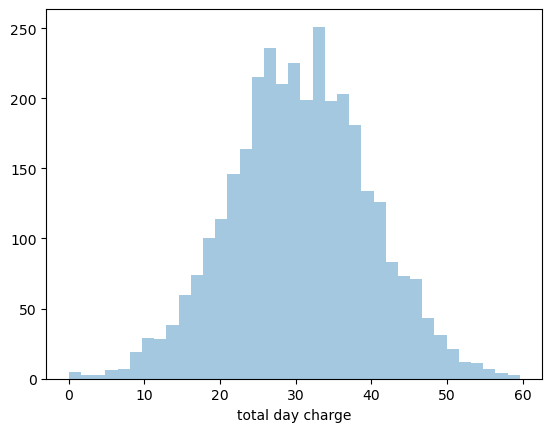

In [133]:
sns.distplot(data['total day charge'], kde=False)
plt.show()

There is a normal distribution for total spend, most clients spend $20-40, and the values are symetrical on either side of the curve.

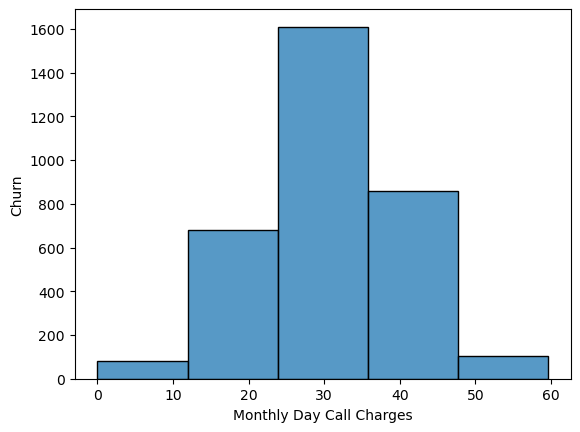

<Figure size 1500x800 with 0 Axes>

In [134]:
# visualize churn rate for day call charges only
sns.histplot(data['total day charge'], bins=5)

plt.xlabel("Monthly Day Call Charges", size=10)
plt.ylabel("Churn", size=10)

plt.figure(figsize=(15,8))
plt.show()

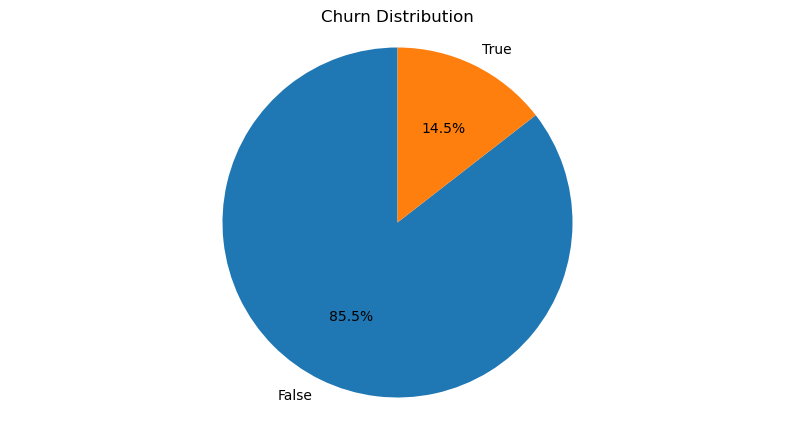

In [135]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = data['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(10, 5))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Of the `3,333 customers` in the dataset, 483 terminated their contract with the Telecom firm. That is 14.5% of customers lost.

The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

Further, we will further review the data to identify outliers, which is crucial to understanding the distribution of values for different columns. For this, our focus is on numeric data. Outliers can significantly impact the performance of machine learning models, which will impacts the feature engineering process.

In [136]:
# view the values and counts for customer service calls for all clients
data['customer service calls'].value_counts()

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

## Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables. For our project, we examine the relationship between each feature and the target variable (customer churn) to understand how they are related.

Here, we are doing some analysis of the customer churning in relation to `state,` `area code,` `international plan,` and `voice mail plan`. We are trying to understand whether there are correlations between the categorical columns and the customer churning rate.

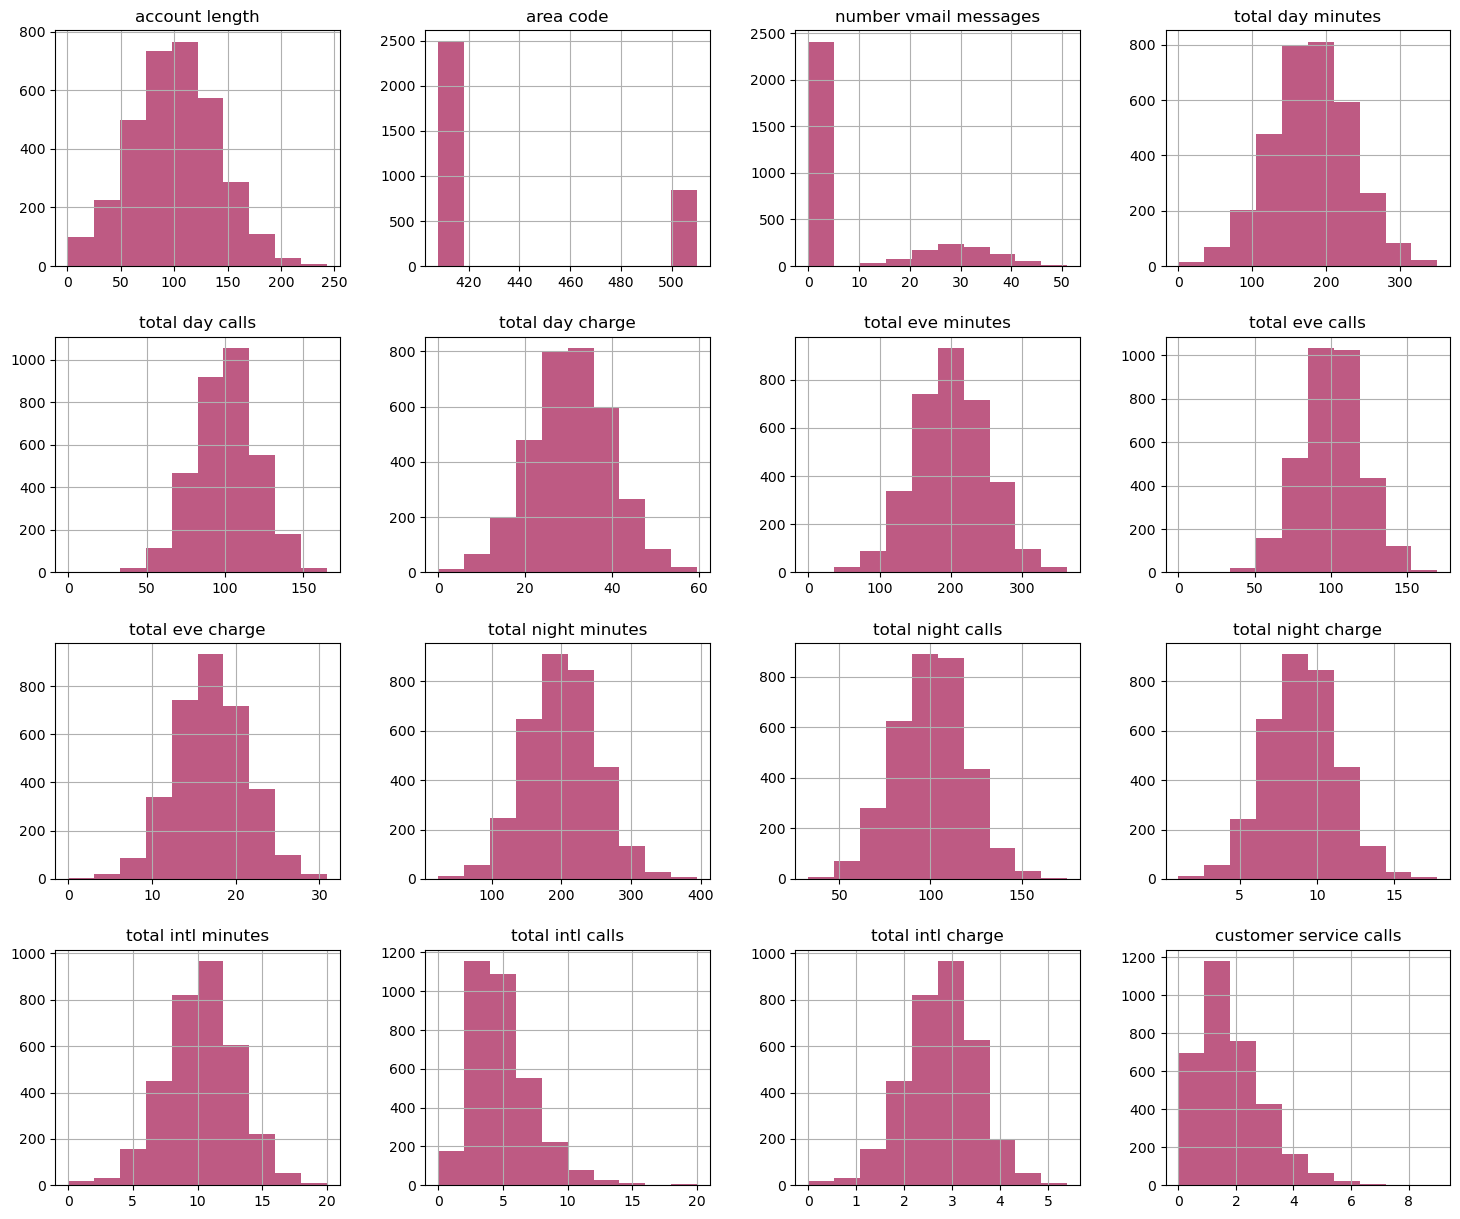

In [137]:
# The Distribution of Features

data.drop(columns='churn').hist(figsize=(18, 15), color="#BE5A83");

We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

In [ ]:
#plt.figure(figsize=(15, 20))  # Adjusted figure size to fit better on the screen

#boxplot_colors = ["teal","purple", "skyblue", "orange", "#C44E52", "#8172B2", "#CCB974"]

#for i, var in enumerate(numerical_vars):
    #plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    #sns.boxplot(x=data[var], color=boxplot_colors[i % len(boxplot_colors)])  # Plotting boxplot and cycling through colors
    #plt.title(f'A boxplot for {var}')
    #plt.xlabel('')  # Keeping x-axis label empty
    #plt.ylabel('')  # Keeping y-axis label empty
    #plt.tight_layout()  # Adjusting layout for each subplot

#plt.rcParams["figure.dpi"] = 150  # Adjusted DPI for better on-screen fit
#plt.suptitle('Boxplots for Numerical Variables\n', fontsize=22, weight='bold')
#plt.subplots_adjust(top=0.95)  # Adjusting spacing for title
#plt.show()

##  Data Preprocessing
In this section, we proprocess the data to prepare it for modelling. In the dataset, we have categorical and numeric data columns, some of which must be tranformed into a datatype acceptable by the different machine learning models used in the modelling section.

A good example would be using one-hot encoding to transform categorical columns with object datatypes to numerical ones, especially 1s and 0s

The dataset must also be split into different sets, the training and testing sets. We will use the training set to train the different models and evaluate the performance using the test data. Cross-validation is used.

We also drop features that have minimal or no effect on the target variables using ridge or lasso regression. We may also identify other frameworks for choosing the best features.

Feature Engineer -> Split -> Standardize

### Feature Engineering
>  The process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. In this phase, we'll perform Label Encoding, One Hot Encoding and Scaling the data.

### Label Encoding

It is a technique used to convert categorical variables into numerical values. This is done by assigning a unique integer to each category. 

In [ ]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])


#### One Hot Encoding

This is a technique used to convert categorical variables into a set of binary features. This is done by creating a new feature for each category, and then assigning a value of 1 to the feature if the category is present and 0 if it is not.

In [ ]:
data = pd.get_dummies(data,columns = ['state', 'area code','international plan','voice mail plan'])
data.head()

### Scaling the data
Scaling is a technique used to transform numerical features into a comparable range. It helps in reducing the impact of outliers and standardizing the variables. One common method of scaling is Min-Max Normalization, which scales the variable values to a specific range. In this process, the minimum value of the variable is transformed to 0, and the maximum value is transformed to 1, while the remaining values are scaled proportionally in between.